In [33]:
import numpy as np
import pandas as pd
import sys
!conda install --yes --prefix {sys.prefix} plotly

Solving environment: ...working... done

# All requested packages already installed.

^C


In [37]:
# data for university A

math = np.random.normal(59, 5, 100)
physics = np.random.normal(78, 7, 100)

math = np.random.randint(0,100,30)
physics = np.random.randint(0,100,30)


In [30]:
import plotly.express as px

In [38]:
px.histogram(math, nbins=25)

In [39]:
px.histogram(physics, nbins=25)

In [44]:
df = pd.DataFrame({'math':math, 'physics':physics})
df.head()

,math,physics
0,70,93
1,75,96
2,30,51
3,97,48
4,49,75


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

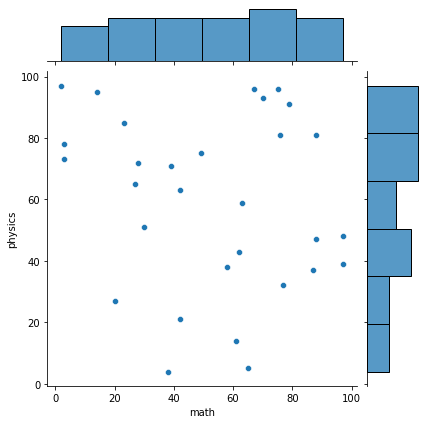

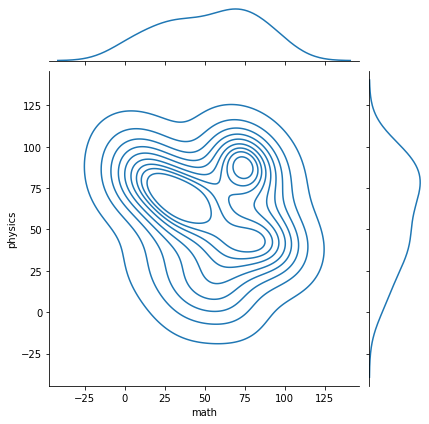

In [45]:
sns.jointplot(data=df, x="math", y="physics");
sns.jointplot(data=df, x="math", y="physics", kind='kde');

In [46]:
# data for university B

# math_b = np.random.normal(90, 15, 100)
# physics_b = np.random.normal(60, 12, 100)

math_b = np.random.normal(70, 7, 100)
physics_b = np.random.normal(65, 5, 100)

In [47]:
df_b = pd.DataFrame({'math':math_b, 'physics':physics_b})
df_b.head()

,math,physics
0,71.281878,62.638932
1,71.917161,66.056444
2,66.695213,72.769420
3,83.934835,65.705535
4,75.730759,69.151745


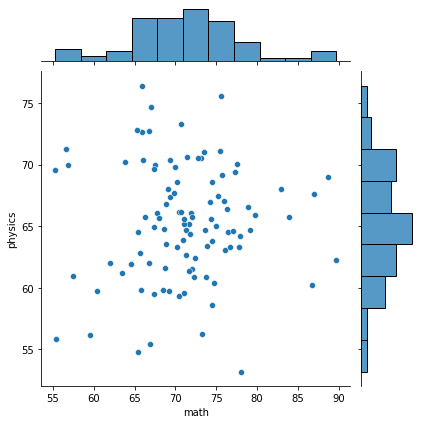

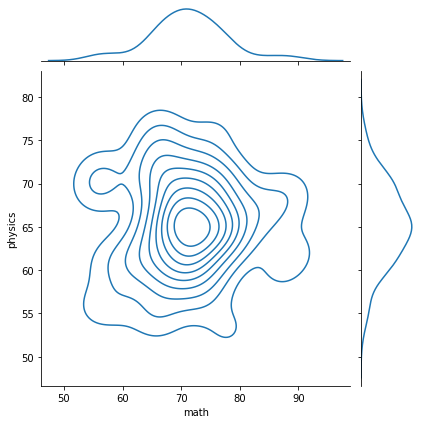

In [48]:
sns.jointplot(data=df_b, x="math", y="physics");
sns.jointplot(data=df_b, x="math", y="physics", kind='kde');

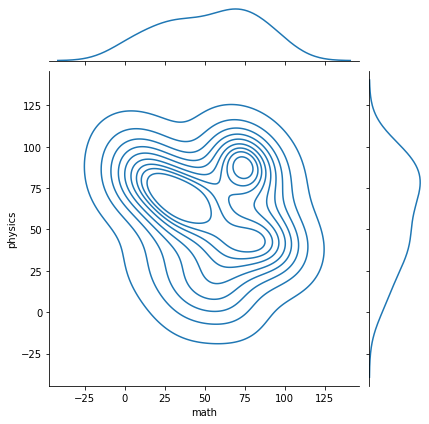

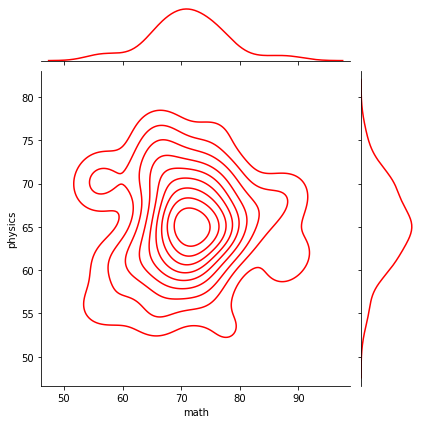

In [49]:
sns.jointplot(data=df, x="math", y="physics", kind='kde');
sns.jointplot(data=df_b, x="math", y="physics", kind='kde', color='red');

In [50]:
df['cluster_label'] = 'a'
df_b['cluster_label'] = 'b'
final_data = pd.concat([df, df_b], ignore_index=True)

In [14]:
final_data.head()

,math,physics,cluster_label
0,66.076559,75.022671,a
1,64.586847,69.406581,a
2,59.885286,97.052915,a
3,61.079548,82.229301,a
4,54.876702,77.317490,a


### Q2. how many clusters do you think below dataset has?

In [51]:
px.scatter(data_frame=final_data, x='math', y='physics', marginal_x='histogram', marginal_y='histogram')

In [16]:
px.scatter(data_frame=final_data, x='math', y='physics', color='cluster_label', marginal_x='histogram', marginal_y='histogram')

### In GMM - our objective is to find out the parameters of the above two gaussians from the data

In [17]:
px.scatter(data_frame=final_data, x='math', y='physics', marginal_x='histogram', marginal_y='histogram')

### Expectation Maximization (EM) Algorithm

- Initialize k Gaussian Distributions
- Expectation step i.e. soft cluster the data
- Maximization step i.e. reestimate the gaussian parameters
- Check for convergence evaluating log-likelihood
- Repeat from step 2 until it converges

### Algorithm in detail

#### 1. Random Initialization of 2 Gaussian Distributions

| cluster_label | mean | variance |
| --- | --- | --- |
| a | 60, 75 | 100 |
| b | 75, 65 | 25 |

In [18]:
px.scatter(data_frame=final_data, x='math', y='physics', marginal_x='histogram', marginal_y='histogram')

#### 2. Expectation step i.e. soft cluster the data i.e. computing of membership of each data point into the both gaussian distributions using the below formula - 

$$
E\left[Z_{1 A}\right]=\frac{N\left(X_{i} \mid \mu_{A}, \sigma_{A}^{2}\right)}{N\left(X_{i} \mid \mu_{A}, \sigma_{A}^{2}\right)+N\left(X_{i} \mid \mu_{B}, \sigma_{B}^{2}\right)}
$$

Probability density function of a normal distrubution is given by -

$$
N\left(X \mid \mu, \sigma^{2}\right)=\frac{1}{\left(2 \pi \sigma^{2}\right)^{2}} e^{-\frac{1}{2 \sigma^{2}}(x-\mu)^{2}}
$$

#### 3. Maximization step i.e. reestimate the gaussian parameters

old gaussian parameters

| cluster_label | mean | variance |
| --- | --- | --- |
| a | 60, 75 | 100 |
| b | 75, 65 | 25 |

new gaussian parameters

$$
\text { new } \mu_{A}=\frac{\sum_{i=1}^{N} E\left[Z_{i j}\right] X_{i}}{\sum_{i \rightarrow 1}^{N} E\left[Z_{i j}\right]}
$$

$$
\text { new } \sigma_{A}^{2}=\frac{\sum_{i=1}^{N} E\left[Z_{i A}\right]\left(X_{i}-\mu_{A}^{\text {new }}\right)\left(X_{i}-\mu_{A}^{\text {nec }}\right)^{T}}{\sum_{i=1}^{N} E\left[Z_{i A}\right]}
$$

| cluster_label | new mean | variance |
| --- | --- | --- |
| a | 59, 78 | 49 |
| b | 70, 65 | 25 |

#### 4. Evaluating log-likelihood

$$
\ln p\left(X \mid \mu, \sigma^{2}\right)=\sum_{i=1}^{N} \ln \left(\sum_{k=1}^{K} \pi_{k} N\left(X_{i} \mid \mu_{k}, \sigma_{k}^{2}\right)\right)
$$

### GMM using sklearn

In [19]:
from sklearn.mixture import GaussianMixture
X = final_data[['math', 'physics']]
gm = GaussianMixture(n_components=2, random_state=0).fit(X)
gm.means_

array([[71.25173675, 64.14298362],
       [58.87643458, 77.15857282]])

In [20]:
gm.predict_proba([[60, 80]])

array([[8.94595428e-04, 9.99105405e-01]])